<a href="https://colab.research.google.com/github/pratikdash07/Capg_ML/blob/main/11_02_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
pop = df['alcohol']
sample_size = 500
sample = df['alcohol'].sample(sample_size)
sample_mean = sample.mean()
pop_mean = pop.mean()
err = sample_mean - pop_mean
print(err)


-0.9800831143452982


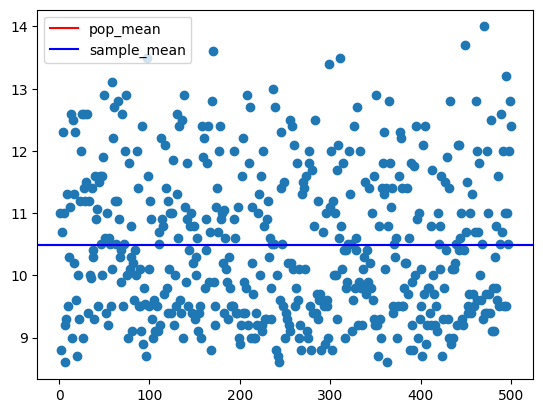

In [ ]:
plt.scatter(range(1,sample_size+1),sample)
plt.axhline(pop.mean(),color = 'red',label = 'pop_mean')
plt.axhline(sample.mean(),color = 'blue',label = 'sample_mean')
plt.legend()
plt.show()

In [ ]:
sample_size = 500

groups = df.groupby('type')

red_df = groups.get_group('red')
white_df = groups.get_group('white')

pop_red = red_df['alcohol']
sample_red = pop_red.sample(sample_size, random_state=42)

red_error = sample_red.mean() - pop_red.mean()

pop_white = white_df['alcohol']
sample_white = pop_white.sample(sample_size, random_state=42)

white_error = sample_white.mean() - pop_white.mean()


print("Red wine mean error:", red_error)
print("White wine mean error:", white_error)

Red wine mean error: 0.012116885553469459
White wine mean error: -0.004300381104110684


In [ ]:

error_percent = (white_error / pop_mean) * 100
print(error_percent)

-0.04098801696028331


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris(as_frame=True)
df = iris.frame

# Add species names
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))

df.head()

In [ ]:
sample_size = 30   # iris is small, so smaller sample
groups = df.groupby('species')

for name in groups.groups.keys():

    group_df = groups.get_group(name)

    pop = group_df['sepal length (cm)']
    sample = pop.sample(sample_size, random_state=42)

    sample_mean = sample.mean()
    pop_mean = pop.mean()

    mean_error = sample_mean - pop_mean
    error_percent = abs(mean_error) / pop_mean * 100

    print(f"{name}:")
    print("Population Mean:", pop_mean)
    print("Sample Mean:", sample_mean)
    print("Mean Error:", mean_error)
    print("Error Percentage:", error_percent, "%\n")

In [ ]:
#Seaborn and matplotlib practice
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = sns.load_dataset("titanic")

df = df.drop(columns=["deck"])        # too many nulls
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

df.isnull().sum()


/tmp/ipython-input-3539271895.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/tmp/ipython-input-3539271895.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


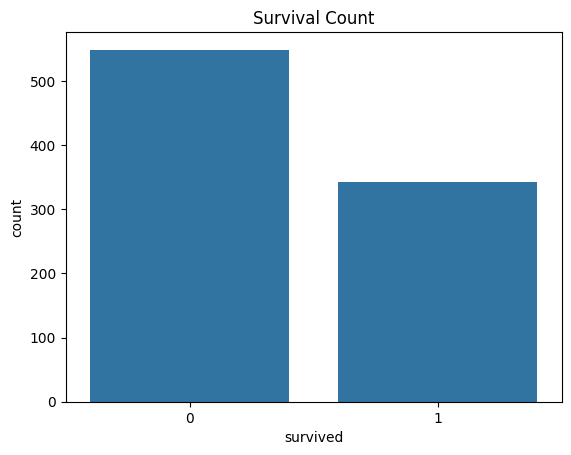

In [ ]:
plt.figure()
sns.countplot(x="survived", data=df)
plt.title("Survival Count")
plt.show()

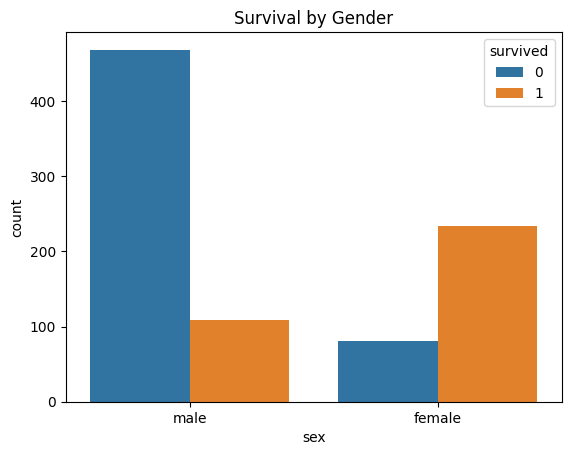

In [ ]:
plt.figure()
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Survival by Gender")
plt.show()

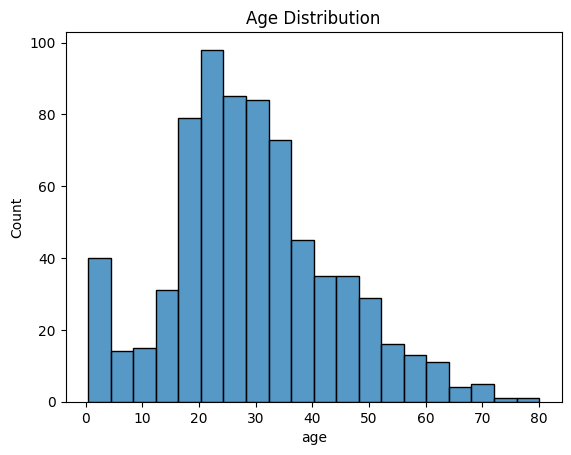

In [ ]:
plt.figure()
sns.histplot(df["age"])
plt.title("Age Distribution")
plt.show()

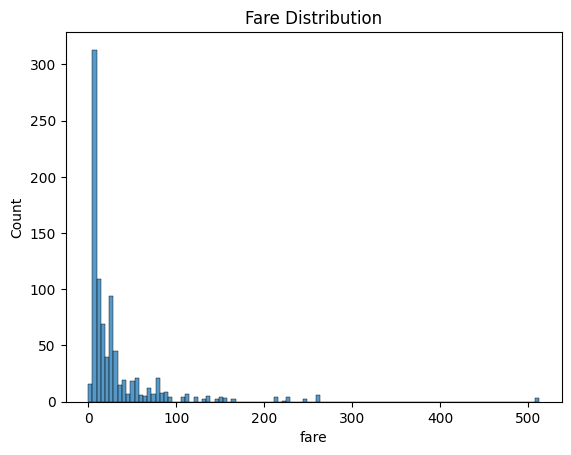

In [ ]:
plt.figure()
sns.histplot(df["fare"])
plt.title("Fare Distribution")
plt.show()

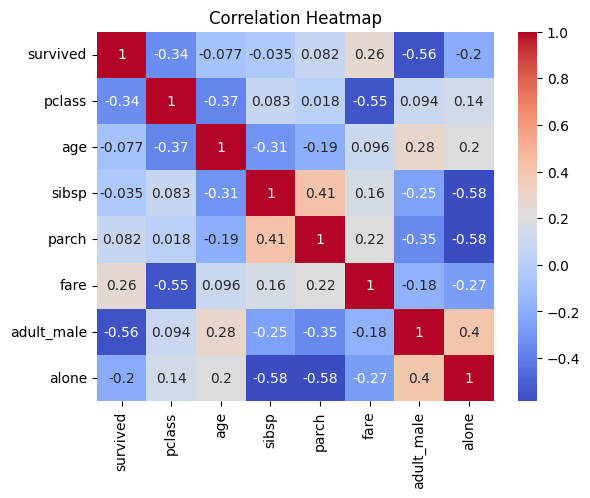

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

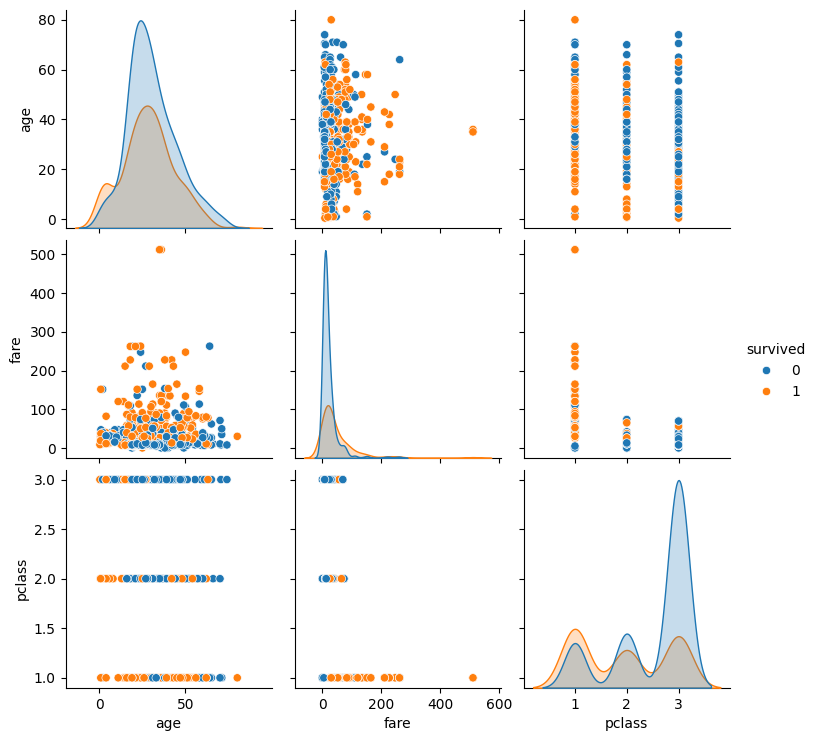

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
cols = ["survived", "age", "fare", "pclass"]

pair_df = df[cols]

sns.pairplot(pair_df, hue="survived", diag_kind="kde")
plt.show()

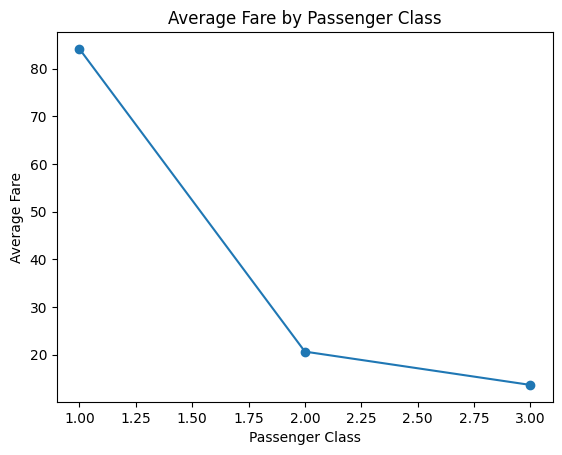

In [ ]:
fare_by_class = df.groupby("pclass")["fare"].mean()

plt.figure()
plt.plot(fare_by_class.index, fare_by_class.values, marker="o")
plt.title("Average Fare by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare")
plt.show()

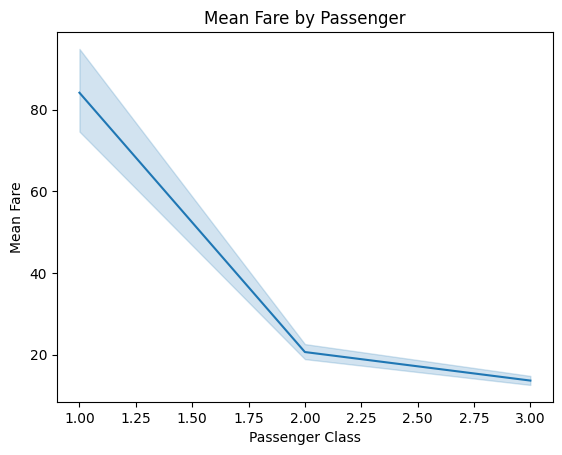

In [ ]:


plt.figure()
sns.lineplot(data=df, x="pclass", y="fare", estimator="mean")
plt.title("Mean Fare by Passenger")
plt.xlabel("Passenger Class")
plt.ylabel("Mean Fare")
plt.show()

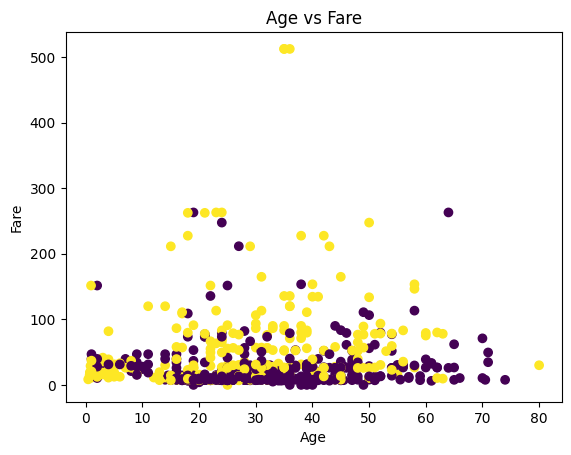

In [ ]:
plt.figure()
plt.scatter(df["age"], df["fare"], c=df["survived"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare")
plt.show()

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/tmp/ipython-input-2662461242.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["age"], df["fare"]], labels=["Age", "Fare"])


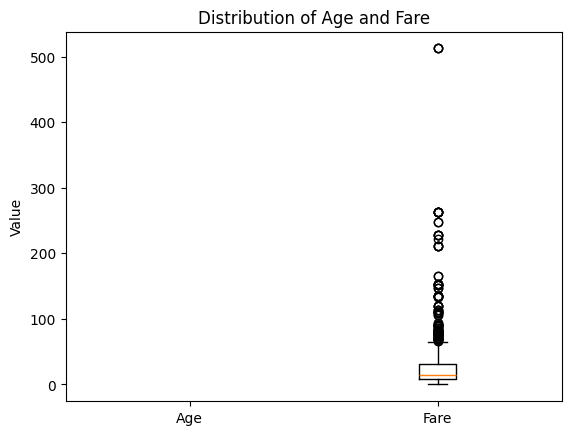

In [ ]:
plt.figure()
plt.boxplot([df["age"], df["fare"]], labels=["Age", "Fare"])
plt.title("Distribution of Age and Fare")
plt.ylabel("Value")
plt.show()